In [1]:
#@markdown Configuración Inicial
from IPython.utils import io

from google.colab.data_table import DataTable
from IPython.display import Javascript
from IPython.display import display, Markdown, Latex
from IPython.display import Audio, Image
from IPython.display import IFrame, HTML
with io.capture_output() as capt:
  !pip install gradio

import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def dLatex(self):
  return display(Latex(self))

def dMarkdown(self):
  return display(Markdown(self))

# Avoids scroll-in-the-scroll in the entire Notebook
# https://stackoverflow.com/a/66891328
def resize_colab_cell():
  display(Javascript(
      'google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'
      ))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

def dLatex(self):
  return display(Latex(self))

def dMarkdown(self):
  return display(Markdown(self))

In [2]:
def Cmass(a):
  k = len(a)
  (x,y) = a.T
  # https://stackoverflow.com/a/30408825
  # https://en.wikipedia.org/wiki/Centroid#Of_a_polygon
  A = -0.5*(np.dot(x,np.roll(y,1))-np.dot(np.roll(x,1),y))
  Cx = np.array(
      [(x[i%k] + x[(i+1)%k])*\
       (x[i%k]*y[(i+1)%k] - x[(i+1)%k]*y[i%k])\
       for i in range(k)]).sum()/A/6
  Cy = np.array(
      [(y[i%k] + y[(i+1)%k])*\
       (x[i%k]*y[(i+1)%k] - x[(i+1)%k]*y[i%k])\
       for i in range(k)]).sum()/A/6
  return np.array([Cx, Cy])

<IPython.core.display.Javascript object>

In [3]:
r1 = np.array([2.54881, 2.74142])
r2 = np.array([11.26103, 6.41231])
r3 = np.array([2.82526, 10.11548])
rm = np.array([6.18, 6.3])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

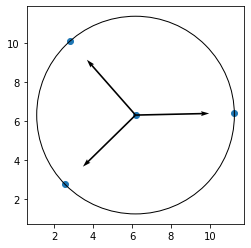

In [4]:
rs = np.array([r1,r2,r3])
r_list = np.array([r1,r2,r3,rm])

l = np.mean([np.sqrt(sum(_**2 for _ in (ri-rm))) for ri in rs])
fig, ax = plt.subplots()
ax.scatter(*r_list.T)
circle1 = plt.Circle(rm, l, fill=False)
ax.add_artist(circle1)
ax.set_xlim(rm[0]-l*1.1, rm[0]+l*1.1)
ax.set_ylim(rm[1]-l*1.1, rm[1]+l*1.1)

ax.quiver(*rm, *(r1-rm), scale=15)
ax.quiver(*rm, *(r2-rm), scale=15)
ax.quiver(*rm, *(r3-rm), scale=15)
ax.set_aspect(1)
plt.show()

In [5]:
# https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

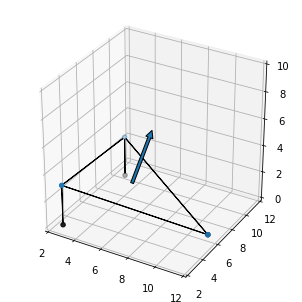

{'Horizontal': '21.426', 'Vertical': '-0.834973'}


In [6]:
def fun(a, b, c, rs=rs):
  r01 = np.append(r1, 0)
  r02 = np.append(r2, 0)
  r03 = np.append(r3, 0)
  rr1 = np.append(r1, a)
  rr2 = np.append(r2, b)
  rr3 = np.append(r3, c)
  r0s = np.array([r01,r02,r03])
  rrs = np.array([rr1,rr2,rr3])
  rrm = np.mean(rrs, axis=0)
  rr_list = np.append(rrs, [rrm], axis=0)
  rrn = np.cross((rr2-rr1),(rr3-rr1))
  rrn = 5*rrn/np.linalg.norm(rrn)

  h = 1-2*np.arctan2(*rrn[[2,0]])/np.pi
  v = 1-2*np.arctan2(*rrn[[2,1]])/np.pi
  
  level = {
  'Horizontal': f'{100*h:g}',
  'Vertical':   f'{100*v:g}'
  }

  fig = plt.figure(figsize=plt.figaspect(1))
  ax = Axes3D(fig)
  ax.scatter(*rrs.T)
  ax.scatter(*r0s.T, c='k')

  # ax.arrow3D(*[0,0,0], *(rr1))
  # ax.arrow3D(*[0,0,0], *(rr2))
  # ax.arrow3D(*[0,0,0], *(rr3))
  ax.arrow3D(*r01, *(rr1-r01))
  ax.arrow3D(*r02, *(rr2-r02))
  ax.arrow3D(*r03, *(rr3-r03))

  ax.arrow3D(*rr1, *(rr2-rr1))
  ax.arrow3D(*rr1, *(rr3-rr1))
  ax.arrow3D(*rr2, *(rr3-rr2))
  ax.arrow3D(*rrm, *rrn, mutation_scale=15)
  ax.set_xlim(2,12)
  ax.set_ylim(2,12)
  ax.set_zlim(0,10)
  plt.close()
  return fig, level

fig, level = fun(3,0,3)
display(fig)
print(level)

In [7]:
iface = gr.Interface(
    fn=fun, 
    inputs=[gr.inputs.Slider(0, 4 , .1, default=2),
            gr.inputs.Slider(0, 4 , .1, default=2),
            gr.inputs.Slider(0, 4 , .1, default=2)],
    outputs=['plot', 'key_values'],
    live=True,
    allow_flagging=False,
    allow_screenshot=False,
    # title='Gravedad Teorica',
    # description='Valores Teoricos de Gravedad',
    # article = """<p style='text-align: center'>
    # <a href='https://en.wikipedia.org/wiki/Theoretical_gravity'>
    # Wikipedia | Theoretical Gravity</a></p>""",
    examples=[[2,0,2]],
    theme='huggingface', # "default", "compact" or "huggingface"
    layout='unaligned' # 'horizontal', 'unaligned', 'vertical'
    )

with io.capture_output() as captured:
    iface.launch(inline=True)
print(iface.share_url)
IFrame(src=iface.share_url, width=1200, height=1000)

<IPython.core.display.Javascript object>

https://17009.gradio.app
